In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re

In [58]:
file_path='E:/Metro2/raw_data//'
df=pd.read_csv(file_path+'Data.csv')

In [59]:
for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        df[column] = df[column].apply(lambda x: 'Will use for both trips' if ',' in x else x)
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)


In [60]:
df['1'].unique()

array(['Tulasi ', 'Vasundhara N ', 'Vasundhara N', 'Tulasi NS ', 'Tulasi',
       'Keerthi M ', 'Varad ', 'Varad Verma ', 'Varad Verm ',
       'Varad. Verma ', 'Sneha', 'Varad Verma', 'Varad verma', 'Sneha ',
       'Ruthu', 'Ruthu m', 'Ruthu m ', 'HAMIM SADIQUE', 'HAMIM SADIQUE ',
       'tulasi ', 'Gayathri Krija ', 'Anshu', 'Gayathri Krija', 'sneha',
       'HARIPRASAD ', 'Govardhan G ', 'Hari Prasad ', 'HariPrasad h',
       'HariPrasad '], dtype=object)

In [61]:
name_dict = {'Tulasi ':'Tulasi', 'Vasundhara N ': 'Vasundhara N', 'Tulasi NS ':'Tulasi',
        'Varad ':'varad', 'Varad Verma ':'varad', 'Varad Verm ':'varad',
       'Varad. Verma ':'varad', 'Varad Verma':'varad', 'Varad verma':'varad','Sneha ':'Sneha',
       'HAMIM SADIQUE ':'HAMIM','HAMIM SADIQUE':'HAMIM','Gayathri Krija ':'Gayathri Krija','tulasi ':'Tulasi',
       'Ruthu m':'Ruthu','Ruthu m ':'Ruthu','sneha':'Sneha','HariPrasad h':'HariPrasad','Hari Prasad ':'HariPrasad','HARIPRASAD ':'HariPrasad',
       'HariPrasad ':'HariPrasad'}

# map column 1 names to the above name_dict
df['1'] = df['1'].map(name_dict).fillna(df['1'])

print(df['1'].unique(),df.shape[0])

['Tulasi' 'Vasundhara N' 'Keerthi M ' 'varad' 'Sneha' 'Ruthu' 'HAMIM'
 'Gayathri Krija' 'Anshu' 'HariPrasad' 'Govardhan G '] 515


### Income not reported

In [62]:
# print the unique values of column 1 where column 21 is NA or null
print(df[df['21'].isna()]['1'].unique())

['Vasundhara N' 'Sneha' 'Ruthu' 'HAMIM' 'Gayathri Krija' 'Anshu'
 'Govardhan G ']


In [63]:

df['Time stamp time'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x.time())
df['Start time of survey']=pd.to_datetime(df['Start time of survey'])
df['Start time of survey'] = df['Start time of survey'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))


C:\Users\PC\AppData\Local\Temp\ipykernel_190800\800887808.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start time of survey']=pd.to_datetime(df['Start time of survey'])


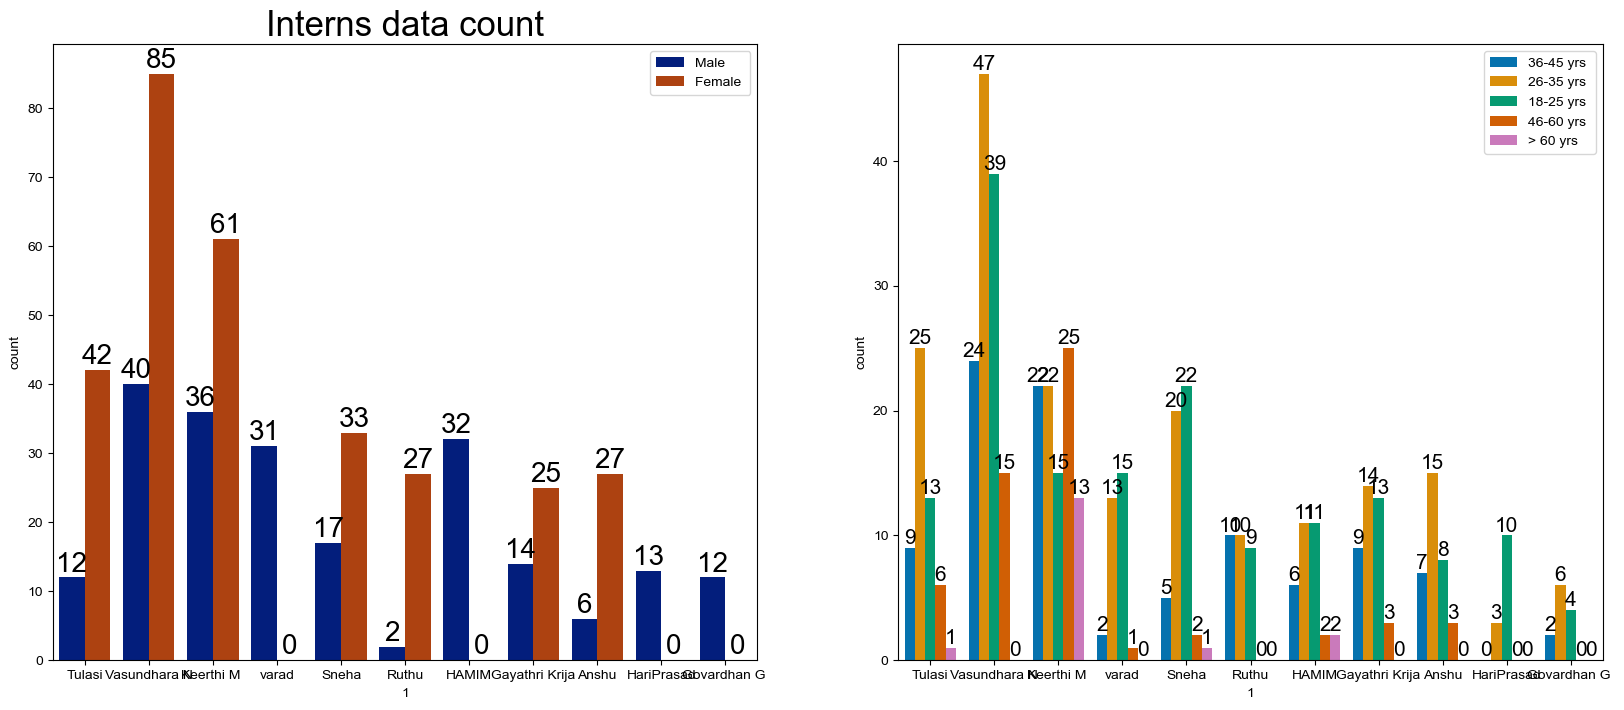

In [64]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['1'],data=df,palette = 'dark',hue='17',saturation=0.95,ax=ax[0])
ax[0].set_title('Interns data count',color='black',size=25)
ax[0].legend()
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
sns.countplot(x=df['1'],data=df,palette = 'colorblind',hue='18',saturation=0.95,ax=ax[1])
ax[1].legend()
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)   


In [65]:
parking_dict={'No, I will not use a bicycle. ':'Will not use',
       'Current travelling conditions with no special cycling facility. Per Trip cost 0₹. Parking cost of 10₹ per day. ':'Current conditions',
       'If a marked cycle lane is provided. Per Trip cost 1₹. Parking cost 10₹ per day. ':'Marked lane',
       'Not Applicable- because neither of my trip end is home. ':'NA',
       'If a marked cycle lane provided along with bicycle traffic signals is provided. Per Trip cost 2₹. Parking cost 10₹ per day. ':'Marked lane + signal',
       'If a segregated cycle track is provided. Per Trip cost 3₹.. Parking cost 10₹ per day. ':'Segregated track',
       'If a segregated cycle track with bicycle signal is provided. Per Trip cost 4₹. Parking cost 10₹ per day. ':'Segregated track + signal'}

df['23']=df['23'].map(parking_dict).fillna(df['23'])

In [66]:
# lets get the count of number of instances for each unique value of column 1 where when column 4 and column 6 both are not equal to Home and also column 23 
# is not equal to NA
print(df[(df['4']!='Home ') & (df['6']!='Home ') & (df['23']!='NA')]['1'].value_counts())

1
Keerthi M         12
HAMIM              5
Anshu              5
Govardhan G        3
Tulasi             2
Gayathri Krija     2
Vasundhara N       1
Sneha              1
varad              1
Name: count, dtype: int64


### Check of qualification with age 

In [67]:
# lets see the value counts of each value in column 19 for each unique entry of column 18
df.groupby('18')['19'].value_counts()

18          19                        
18-25 yrs   Graduate                      109
            12th Std.                      24
            Trade/Diploma Certificate      15
            Postgraduate                    8
            10th Std.                       3
26-35 yrs   Graduate                      125
            Trade/Diploma Certificate      21
            Postgraduate                   19
            12th Std.                      12
            10th Std.                       6
            < 10th Std.                     2
            Doctorate                       1
36-45 yrs   Graduate                       38
            12th Std.                      22
            Postgraduate                   13
            Trade/Diploma Certificate       9
            10th Std.                       9
            < 10th Std.                     4
            Doctorate                       1
46-60 yrs   12th Std.                      26
            Graduate                     

### Age and occupation

In [68]:
df.groupby('18')['20'].value_counts()

18          20                           
18-25 yrs   Student                          123
            Employed Private                  30
            Business                           5
            Daily Wage                         1
26-35 yrs   Employed Private                 125
            Unemployed/Retired/Homemaker      27
            Student                           13
            Business                           9
            Employed Govt.                     9
            Daily Wage                         3
36-45 yrs   Employed Private                  45
            Unemployed/Retired/Homemaker      31
            Business                          11
            Employed Govt.                     5
            Daily Wage                         4
46-60 yrs   Unemployed/Retired/Homemaker      28
            Employed Private                  15
            Employed Govt.                    11
            Business                           2
            Daily Wage     

#### Prints if the respondent reported as unemployed but his details such as age, OD are not consistent

In [69]:
df['20'].unique()

# for each entry of column 20 with 'Unemployed/Retired/Homemaker ' get the column 1 and column Timestamp if column 18 is not >60 yrs or 46-60 yrs,
#  and column 4 is work and column 6 is work
df[(df['20']=='Unemployed/Retired/Homemaker ') & (df['18']!='>60 yrs') & (df['18']!='46-60 yrs') & (df['4']=='Work ') & (df['6']=='Work ')][['1','Timestamp']]

# df[df['20']=='Unemployed/Retired/Homemaker '][['18','17','4','6']]

,1,Timestamp


In [73]:
df[df['1']=='HariPrasad']['5'].unique()

array(['Community institute of management, jayanagar ', 'Ulall',
       'Sirike bus bus Stop', 'Malleswaram ',
       'Ashok Nagar police station ', 'Mejestrict court ', 'Acs college ',
       'Bidadi', 'MC layout ', 'Ramurthy nagar', 'ITPL', 'Rohan avrithi',
       'Near byapnalli ground '], dtype=object)